# Análisis de componentes principales (PCA)

    - El análisis de componentes principales (Principal component analysis) es una técnica de reducción de dimensionalidad, ya que los datos se transforman en un nuevo set de datos que son linealmente independientes y que conservan la mayor varianza posible de la información original en el menor número de nuevas variables
    
    - El método consiste en calcular los eigenvalores y eigenvectores (unitarios) de la matriz de covarianza o correlación de los datos centrados respecto a la media (resultando en media 0). Cuando la matriz de covarianza es utilizada es para preservar la interpretabilidad de los resultados. Sin embargo, cuando las variables no son homogeneas en sus unidades o existe una dispersión excesiva de los datos se recomiendo usar la matriz de correlación (normalizada por la desviación estándar para obtener varianza 1).
    
    - Cuando se calcula R con N-1 o con N, los eigenvalores de las matrices no cambian

### 1] Obtener muestra multivariada

    - Se utiliza el dataset iris por conveniencia.

In [78]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Numeric variables to run PCA
features = ["sep_len", "sep_wid", "pet_len", "pet_wid"]

# Load iris dataset
iris = datasets.load_iris()
df_data = pd.DataFrame(data=np.c_[iris["data"], iris["target"]], columns=features + ["target"])
df_aux_target = pd.DataFrame.from_dict({"target": [i for i in range(3)], "class": iris["target_names"]})
df_data = pd.merge(df_data, df_aux_target, on="target", how="left")
df_data.index.name = "index"

# Output
print("="*100)
print(df_data.head(5))
print("="*100)

       sep_len  sep_wid  pet_len  pet_wid  target   class
index                                                    
0          5.1      3.5      1.4      0.2     0.0  setosa
1          4.9      3.0      1.4      0.2     0.0  setosa
2          4.7      3.2      1.3      0.2     0.0  setosa
3          4.6      3.1      1.5      0.2     0.0  setosa
4          5.0      3.6      1.4      0.2     0.0  setosa


### 2] Correr PCA Manualmente

    - Se muestran los resultados más importantes para un análisis futuro.

In [79]:
# Transform data by centering to the mean and scaling to unit variance
trans_data = ( (df_data[features] - df_data[features].mean(axis=0))
              / (df_data[features].var(axis=0, ddof=0)**0.5) )

# Compute covariance matrix
R_mx = np.cov(trans_data, bias=False, rowvar=False)

# Calculate eigenvalues
eigen = np.linalg.eig(R_mx)
eigenvalues = eigen[0]

# Eigenvectors, returned vertically
eigenvectors = pd.DataFrame(eigen[1], columns=["eigenvec_"+str(i) for i in range(4)])

# Percentage of explained variance for each PC
perc_exp_var = eigenvalues / eigenvalues.sum()

# Scores or transformed data or projected data into PCs
scores = np.matmul(np.array(trans_data), np.array(eigenvectors))
scores = pd.DataFrame(scores, columns=["PC_"+str(i) for i in range(1,5)])

# Output
print("="*100)
print("Eigenvalues:\n",np.round(eigenvalues,3))
print("\nEigenvectors:\n", np.round(eigenvectors,3))
print("\nPercentage of explained variance: \n",np.round(eigenvalues / eigenvalues.sum(),3))
print("\nScores of principal components:\n", scores.head(3))
print("="*100)

Eigenvalues:
 [2.938 0.92  0.148 0.021]

Eigenvectors:
    eigenvec_0  eigenvec_1  eigenvec_2  eigenvec_3
0       0.521      -0.377      -0.720       0.261
1      -0.269      -0.923       0.244      -0.124
2       0.580      -0.024       0.142      -0.801
3       0.565      -0.067       0.634       0.524

Percentage of explained variance: 
 [0.73  0.229 0.037 0.005]

Scores of principal components:
        PC_1      PC_2      PC_3      PC_4
0 -2.264703 -0.480027 -0.127706  0.024168
1 -2.080961  0.674134 -0.234609  0.103007
2 -2.364229  0.341908  0.044201  0.028377


### 3] PCA con librerías

    - Se muestra el proceso de ejecución y los atributos más importantes

In [80]:
# Transform data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_data[features])
trans_data = scaler.transform(df_data[features])

# Run PCA model and get PC projections
from sklearn.decomposition import PCA
pca_model = PCA()
pca_model.fit(trans_data)

# Calculate eigenvalues and vectors
pca_data = pca_model.transform(trans_data)
eigenvalues = pca_data.var(axis=0, ddof=0)

# Eigenvectors, returned vertically
# ... by default are returned horizontally
eigenvectors = pca_model.components_.T

# Percentage of explained variance for each PC
perc_exp_var = pca_model.explained_variance_ratio_

# Calculate scores to obtain PC
scores = pd.DataFrame(pca_data, columns=["PC_"+str(i) for i in range(1,5)])



print("="*100)
print("Eigenvalues:\n",np.round(eigenvalues,3))
print("\nEigenvectors:\n", np.round(eigenvectors,3))
print("\nPercentage of explained variance: \n",np.round(eigenvalues / eigenvalues.sum(),3))
print("\nScores of principal components:\n", scores.head(3))
print("="*100)

Eigenvalues:
 [2.918 0.914 0.147 0.021]

Eigenvectors:
 [[ 0.521  0.377 -0.72  -0.261]
 [-0.269  0.923  0.244  0.124]
 [ 0.58   0.024  0.142  0.801]
 [ 0.565  0.067  0.634 -0.524]]

Percentage of explained variance: 
 [0.73  0.229 0.037 0.005]

Scores of principal components:
        PC_1      PC_2      PC_3      PC_4
0 -2.264703  0.480027 -0.127706 -0.024168
1 -2.080961 -0.674134 -0.234609 -0.103007
2 -2.364229 -0.341908  0.044201 -0.028377


### 4] Correlación entre PC_i y X_j
    - Alternativamente, en vez de hacer unitarios a los eigenvectores, se puede modificar su norma para que sea igual a la varianza explicada por la PC_i. Los nuevos eigenvectores se calculan como:
    eigenvector_corr = eigenvector_unit * eigenvalue^0.5
    
    - Los nuevos eigenvectores tienen una nueva interpretabilidad, ya que la componente j describe la correlación de Pearson con la variable j. Es otras palabras, la componente eigenvector_11 será igual a la correlación entre PC_1 y X_1.
    
    - Estos nuevos factores se llaman loadings.

In [76]:
# Compute loadings
loadings = eigenvectors * eigenvalues**0.5

# Calculate correlation between PC1 and variables
corr = [np.corrcoef(trans_data[features[i]], scores["PC_1"])[0,1] for i in range(4)]

# Output
print("="*100)
print("Loadings:")
print(np.round(loadings,3))
print("\nCorrelation PC_1 vs variables:")
print(np.round(corr,3))
print("="*100)

Loadings:
[[ 0.89   0.361 -0.276 -0.038]
 [-0.46   0.883  0.094  0.018]
 [ 0.992  0.023  0.054  0.115]
 [ 0.965  0.064  0.243 -0.075]]

Correlation PC_1 vs variables:
[ 0.89  -0.46   0.992  0.965]


### 4] Biplot

    - El biplot es uno de los gráficos que más información arrojan sobre el PCA.
    - Las unidades de estudio se agrupan en el plano de las PC, lo que permite definir clusters con cualidades similares.
        Por ejemplo, la especie de la planta

    - Los vectores representan cada uno a una de las variables, el tamaño del vector es proporcional a la varianza que aportan a cada dimensión
        Por ejemplo, sep_wid tiene una componente pequeña para PC_1, pero muy grande para PC_2, o sea que es muy importante para explicar la segunda, pero no la primera

    - La colinealidad y dirección de los vectores representan la relación entre variables
        Por ejemplo, pet_wid está muy correlacionado con pet_len (ángulo entre ellos pequeño) positivamente (apuntan a la misma dirección), pero no están correlacionado con sep_wid, pues el ángulo que forman entre ellos es de casi 90 gradosl.

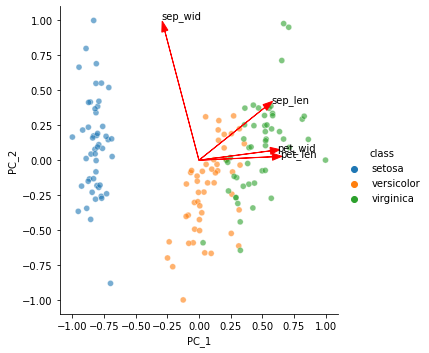

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

pc_0 = scores["PC_1"]
pc_0 = (pc_0 - pc_0.min()) / (pc_0.max() - pc_0.min())*2 - 1
pc_1 = scores["PC_2"]
pc_1 = (pc_1 - pc_1.min()) / (pc_1.max() - pc_1.min())*2 - 1

# Plot scores of each unit
#plt.scatter(pc_0, pc_1, alpha=0.5, color="gray")
sns.relplot(x=pc_0, y=pc_1, hue=df_data["class"], alpha=0.6)


# Plot eigenvectors
for i in range(4):
    plt.arrow(0, 0, eigenvectors[i,0], eigenvectors[i,1], head_width=0.05, color="red")
    plt.text(eigenvectors[i,0]*1.1, eigenvectors[i,1]*1.1, features[i])
